In [2]:
'''
Feature Transformations:

- Normalization and Standardization ---> Scaling Techniques
- Scaling to Max Min vals
- Scaling to Median and Quartiles
- Gaussian Transformation
- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation
- Box Cox Transformation 

'''
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy.stats as stat
import numpy as np

In [3]:
# Standardization:- scaling technique that applies z-transform on each data pt to make the distribution Standard Normal Distribution

relevant_cols = ['pclass', 'age', 'fare', 'survived']
titanic = sns.load_dataset('titanic')
titanic_df = titanic[relevant_cols]
titanic_df.head()

,pclass,age,fare,survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [4]:
# checking if cols in the df contain na vals
titanic_df.isna().sum()

pclass        0
age         177
fare          0
survived      0
dtype: int64

In [5]:
# since age has na vals --> fill with median vals

# titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True) ---> depricating soon
# titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].median()) 
titanic_df.fillna({'age' : titanic_df['age'].median()}, inplace=True)
titanic_df.isna().sum()
#### All na vals dealt with


C:\Users\premt\AppData\Local\Temp\ipykernel_18840\878784707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.fillna({'age' : titanic_df['age'].median()}, inplace=True)


pclass      0
age         0
fare        0
survived    0
dtype: int64

In [6]:
### Divide between features and targets

X = titanic_df.iloc[:,:-1] # include all rows and all columns except for the last one
y = titanic_df.iloc[:,-1]

In [7]:
### independent features
X.head()

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [8]:
## dependent target
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [9]:
### train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
### Standardization ---> set mean=0, std dev = 1 and transform the dataset to follow a standard normal distribution.

from sklearn.preprocessing import StandardScaler

### use fit transform only once to compute the mean and std dev for the scaler and then for scaling other data use only transform to ensure all data sets are using the same scaling criterion.
ss = StandardScaler()
X_scaled = ss.fit_transform(X_train)
X_scaled[:5]


array([[-1.63788124, -1.91971935,  0.98099823],
       [ 0.80326712, -0.0772525 , -0.46963364],
       [ 0.80326712, -2.15002771, -0.40613632],
       [-0.41730706,  0.53690312, -0.08023177],
       [-0.41730706,  1.07428929, -0.10965138]])

In [11]:
X_test_scaled = ss.transform(X_test)
X_test_scaled[:5]

array([[ 0.80326712, -0.0772525 , -0.32547755],
       [-0.41730706,  0.15305586, -0.41855727],
       [ 0.80326712, -0.69140812, -0.46906094],
       [-0.41730706, -1.76618045,  0.02273686],
       [ 0.80326712, -1.15202483, -0.40401026]])

In [12]:
### Creating a log reg model for survival prediction

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_scaled, y_train)
log_reg.score(X_test_scaled, y_test)


0.7238805970149254

In [13]:
### Min Max Scaling ---> range for scale within [0,1]
###                 ---> majorly used in DL ---> CNNs
# X_scaled = (X - X_min / (X_max - X_min))

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
mm_scaled_df = pd.DataFrame(mm.fit_transform(titanic_df), columns=titanic_df.columns)
mm_scaled_df.head()


,pclass,age,fare,survived
0,1.0,0.271174,0.014151,0.0
1,0.0,0.472229,0.139136,1.0
2,1.0,0.321438,0.015469,1.0
3,0.0,0.434531,0.103644,1.0
4,1.0,0.434531,0.015713,0.0


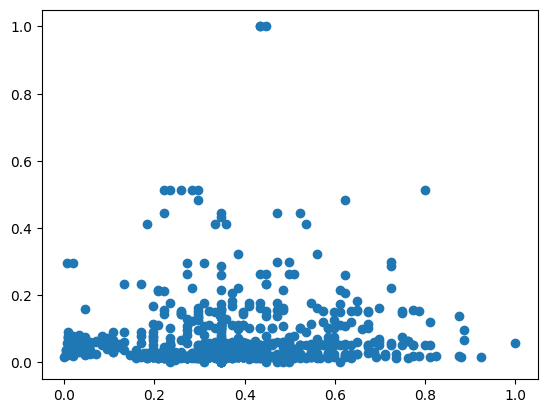

In [14]:
plt.scatter(mm_scaled_df.age, mm_scaled_df.fare)

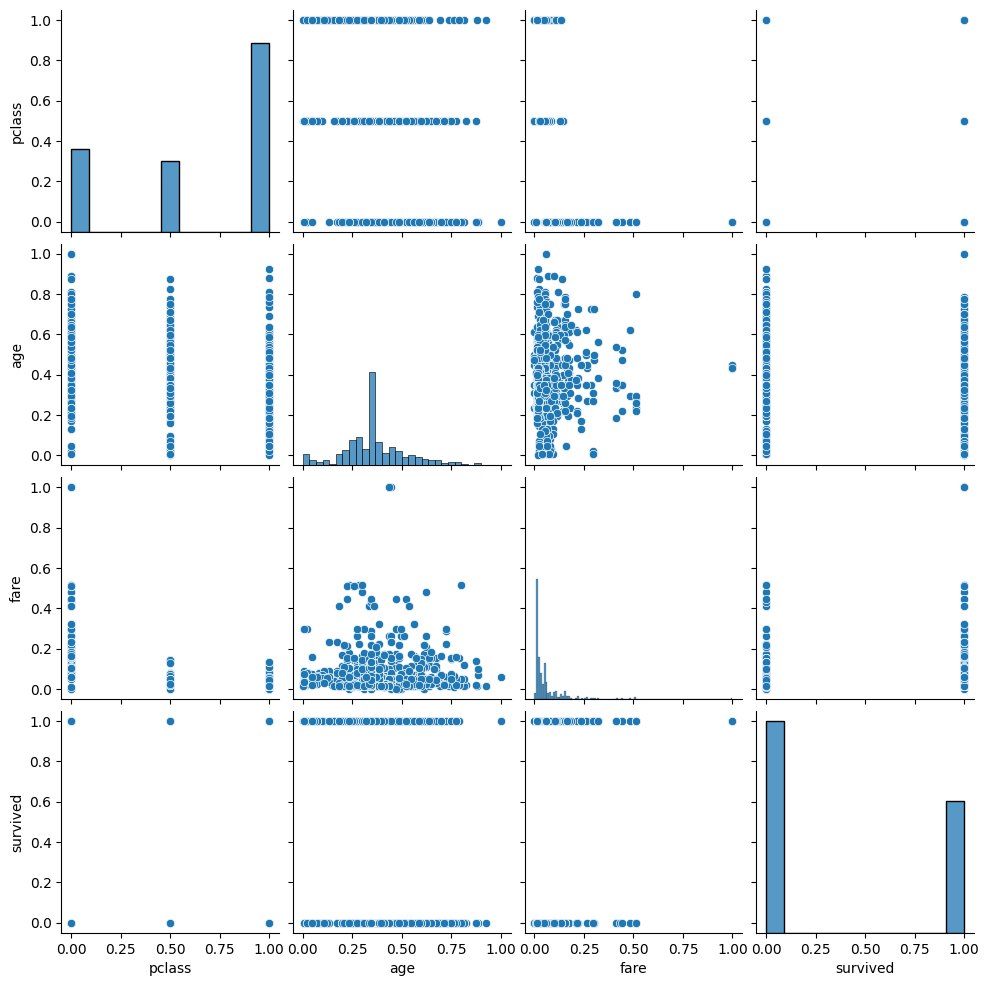

In [15]:
sns.pairplot(mm_scaled_df)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
### Robust Scaler ---> good for outlier detection and treatment
# used to scale features to median and quantile range
# Interquantile difference => diff between 75th and 25th quantile
# IQR = 75th Quantile - 25th Quantile ---> 75th percentile and 25th percentile
# X_scaled = (X - X.median) / IQR

from sklearn.preprocessing import RobustScaler

rbscaler = RobustScaler()
df_robust_scaler_transformed = pd.DataFrame(rbscaler.fit_transform(X_train))
df_robust_scaler_transformed.head()

,0,1,2
0,-2.0,-1.846154,2.953082
1,0.0,0.000000,-0.287334
2,0.0,-2.076923,-0.145494
3,-1.0,0.615385,0.582510
4,-1.0,1.153846,0.516793


In [18]:
rbscaler.transform(X_test)[:5]

array([[ 0.        ,  0.        ,  0.03468127],
       [-1.        ,  0.23076923, -0.17323987],
       [ 0.        , -0.61538462, -0.28605476],
       [-1.        , -1.69230769,  0.81252136],
       [ 0.        , -1.07692308, -0.1407448 ]])

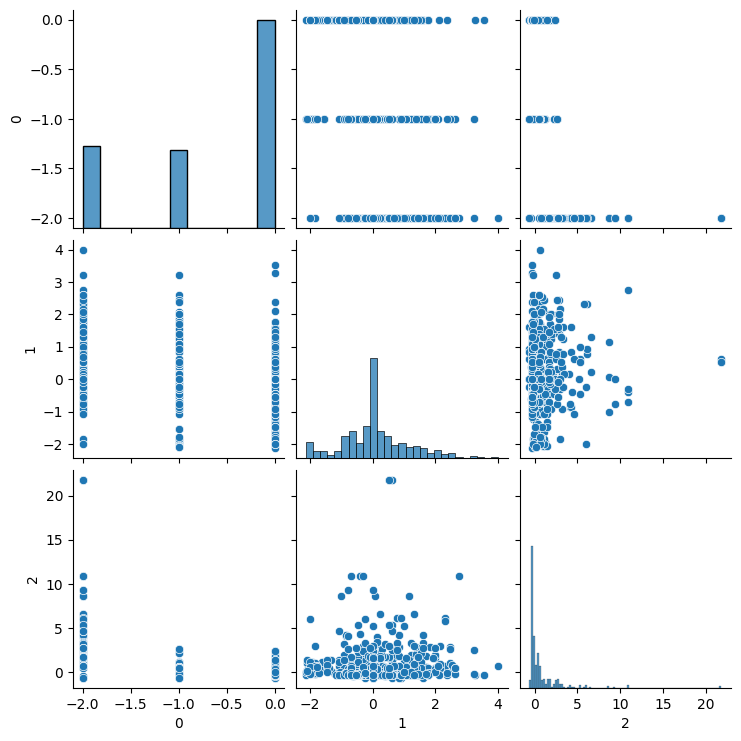

In [19]:
sns.pairplot(df_robust_scaler_transformed)

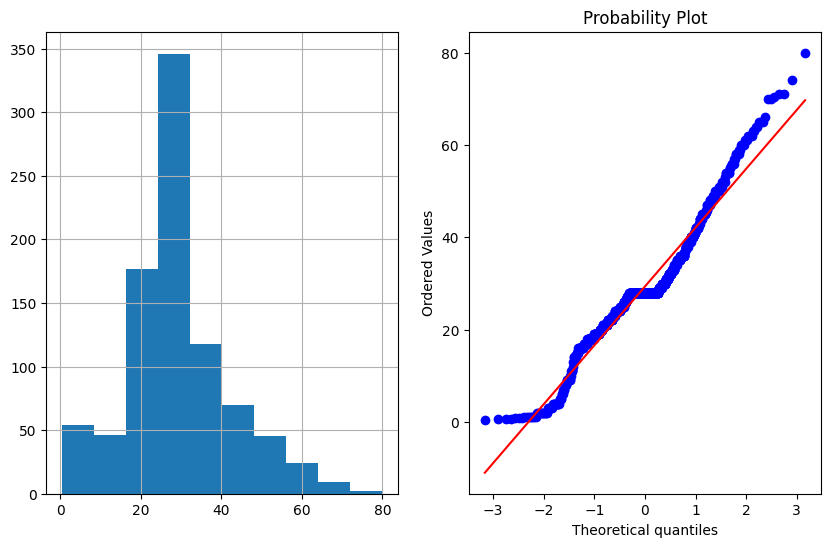

In [23]:
### Gaussian Transformation - some ANNs and most supervised learning algos like lin and log regr. assume that the features are linearly distributed.
### convert data sets belonging to other distributions into a gaussian distribution 

'''
Any of these can be used to transform data set to follow a normal distri:

- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation
- Exponential Transformation
- Box Cox Transformation 
'''

## Q-Q plot to check if a feature is gaussian or not
def plot_fig(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

plot_fig(titanic_df, 'age')
### visible that the data is slighly right skewed and we want to find a transformation that gives us the gaussian version of the distribution

C:\Users\premt\AppData\Local\Temp\ipykernel_18840\970677696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age_log'] = np.log(titanic_df.age)


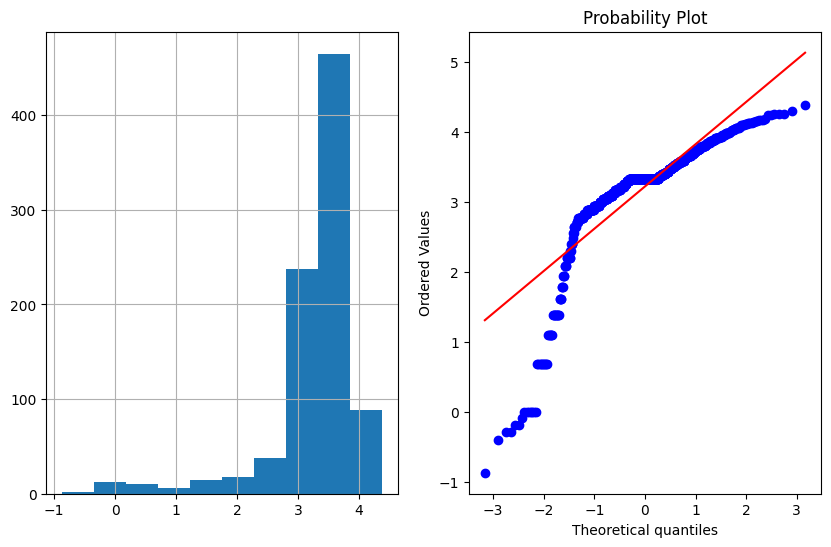

In [21]:
# logarithmic transformation if data was log distributed
# log transformation can be ignored for this data set as it does not transform my data into a gaussian.
titanic_df['age_log'] = np.log(titanic_df.age)
plot_fig(titanic_df, 'age_log')
# visibly left skewed

C:\Users\premt\AppData\Local\Temp\ipykernel_18840\374979472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age_reciprocal'] = 1/titanic_df.age


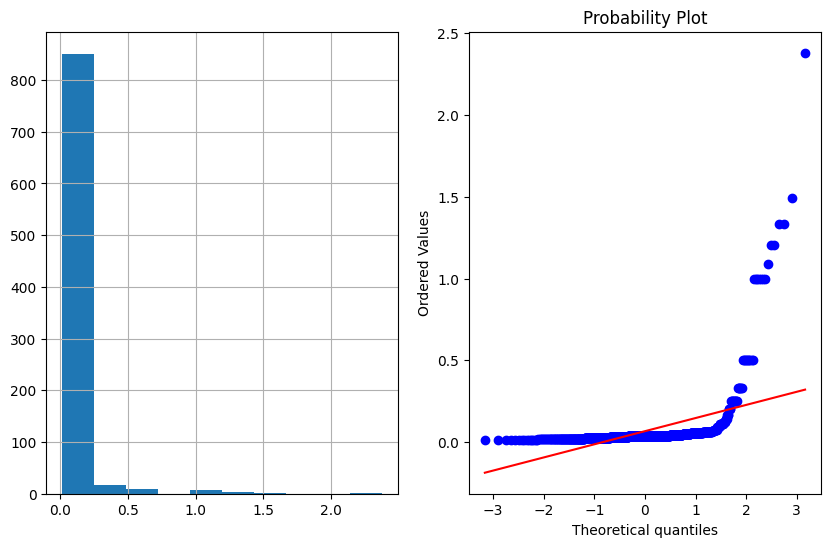

In [ ]:
### Reciprocal Transformation

titanic_df['age_reciprocal'] = 1/titanic_df.age
plot_fig(titanic_df, 'age_reciprocal')

## very bad ---> data completely right skewed.
## Rejected

C:\Users\premt\AppData\Local\Temp\ipykernel_18840\2367268228.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age_sqrt'] = titanic_df.age**(1/2)


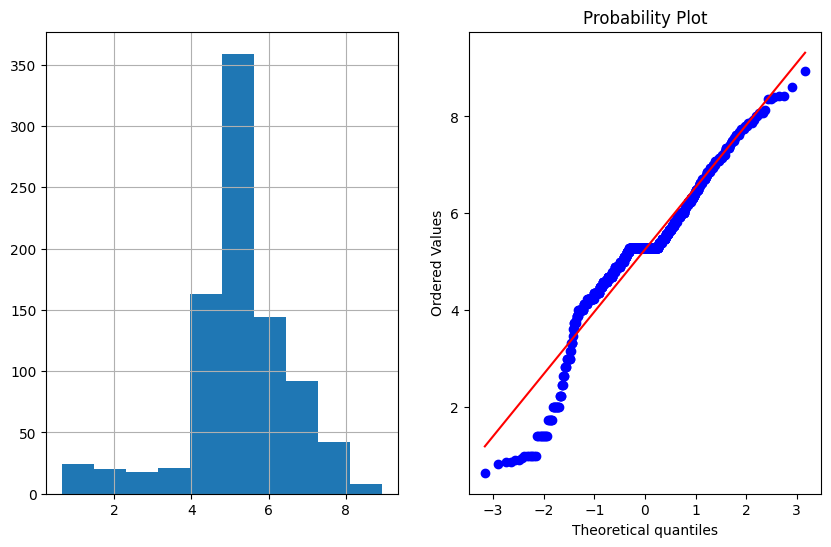

In [26]:
### Square Root Transformation

titanic_df['age_sqrt'] = titanic_df.age**(1/2)
plot_fig(titanic_df, 'age_sqrt')

### almost there ---> the data is mostly gaussian now ---> still slighly left skewed 

C:\Users\premt\AppData\Local\Temp\ipykernel_18840\1587526024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age_exp'] = titanic_df.age**(1/1.2)


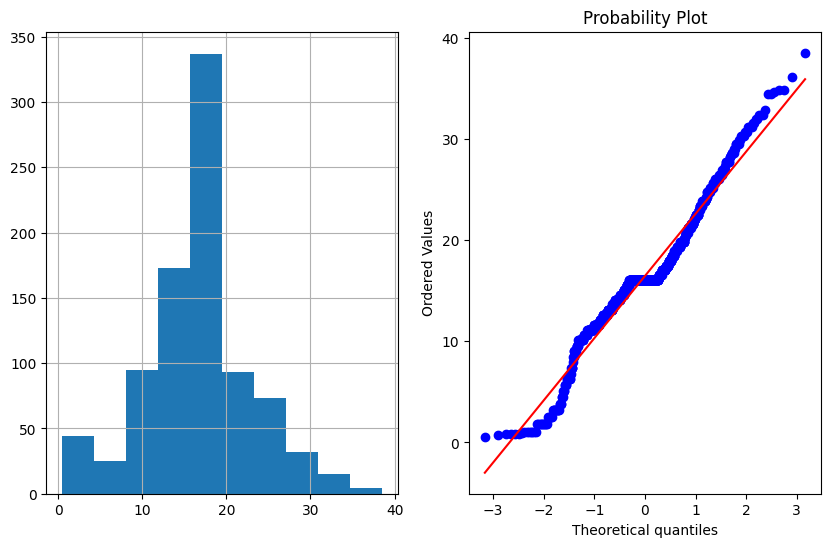

In [ ]:
### Exponential Transformation

titanic_df['age_exp'] = titanic_df.age**(1/1.2)
plot_fig(titanic_df, 'age_exp')

# now the distribution looks mostly gaussian

In [30]:
### BoxCox transformation

titanic_df['age_boxcox'], parameters = stat.boxcox(titanic_df.age)
parameters # transformation parameter calculated by the the function

C:\Users\premt\AppData\Local\Temp\ipykernel_18840\3083597089.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['age_boxcox'], parameters = stat.boxcox(titanic_df.age)


np.float64(0.796453194094064)

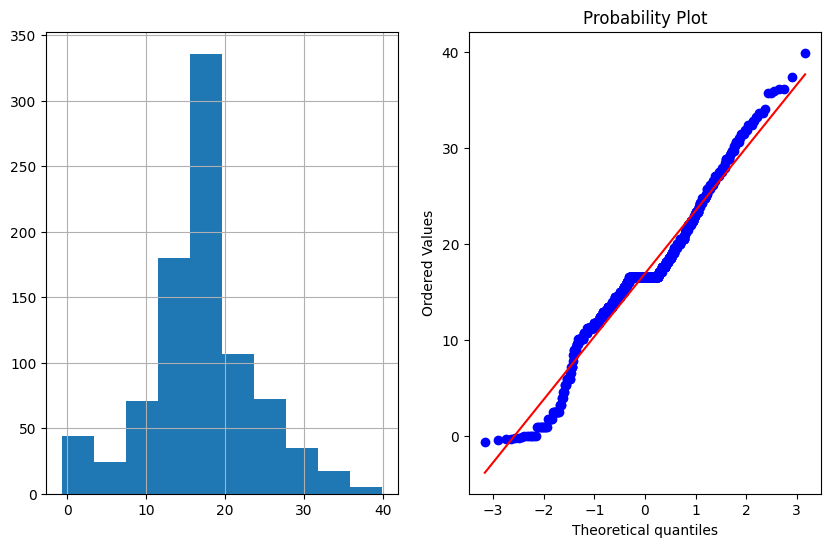

In [ ]:
plot_fig(titanic_df, 'age_boxcox')

## Also a solid choice to transform the age feature

In [32]:
#### Conclusion:

#### to transform the age feature to follow a gaussian distribution --> use either exponential transform or boxcox transform.